<a href="https://colab.research.google.com/github/makozi/AfrikaansNMT/blob/master/Afrikaans_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Afrikaans to English Translation


### Preparing the  Data

Data preparation is divided into two subsections:

1. Clean Data
2. Split Text



#### 1. Cleaning Data

In [104]:
def load_doc(file_name):
    # Open the file as read only
    file = open(filename, mode='rt', encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


In [105]:
# splitting the loaded text by line and then by phrase.
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs

Performing cleaning to do the following:

- Removing all non-printable characters.
- Removing all punctuation characters.
- Normalizing all Unicode characters to ASCII (e.g. Latin characters).
- Normalizing the case to lowercase.
- Removing any remaining tokens that are not alphabetic.

Performing these operations on each phrase for each pair in the loaded dataset.

In [106]:
# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			# normalize unicode characters
			line = normalize('NFD', line).encode('ascii', 'ignore')
			line = line.decode('UTF-8')
			# tokenize on white space
			line = line.split()
			# convert to lowercase
			line = [word.lower() for word in line]
			# remove punctuation from each token
			line = [word.translate(table) for word in line]
			# remove non-printable chars form each token
			line = [re_print.sub('', w) for w in line]
			# remove tokens with numbers in them
			line = [word for word in line if word.isalpha()]
			# store as string
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)

In [107]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs
 
# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			# normalize unicode characters
			line = normalize('NFD', line).encode('ascii', 'ignore')
			line = line.decode('UTF-8')
			# tokenize on white space
			line = line.split()
			# convert to lowercase
			line = [word.lower() for word in line]
			# remove punctuation from each token
			line = [word.translate(table) for word in line]
			# remove non-printable chars form each token
			line = [re_print.sub('', w) for w in line]
			# remove tokens with numbers in them
			line = [word for word in line if word.isalpha()]
			# store as string
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)
 
# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)
 
# load dataset
filename = 'afr.txt'
doc = load_doc(filename)
# split into english-german pairs
pairs = to_pairs(doc)
# clean sentences
clean_pairs = clean_pairs(pairs)
# save clean pairs to file
save_clean_data(clean_pairs, 'english-afrikaans.pkl')
# spot check
for i in range(100):
	print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))

Saved: english-afrikaans.pkl
[come in] => [gaan binne]
[she runs] => [sy hardloop]
[you lost] => [jy verloor]
[go inside] => [gaan binne]
[he is poor] => [hy is arm]
[i eat rice] => [ek eet rys]
[we all lie] => [ons almal lieg]
[im thirsty] => [ek is dors]
[thats life] => [dis die lewe]
[tom hurt me] => [tom het my beseer]
[tom may die] => [tom kan dalk dood gaan]
[what a pity] => [hoe jammer]
[youve lost] => [jy verloor]
[find the cat] => [soek die kat]
[i have a car] => [ek het n kar]
[please hurry] => [maak asseblief gou]
[we all stood] => [ons almal het gestaan]
[what a shame] => [hoe jammer]
[even tom lied] => [selfs tom het gelieg]
[im not blind] => [ek is nie blind nie]
[its too ugly] => [dis te lelik]
[let tom drive] => [laat tom bestuur]
[tom had to go] => [tom moes gaan]
[tom wont die] => [tom sal nie dood gaan nie]
[was tom there] => [was tom daar]
[we need money] => [ons het geld nodig]
[you are drunk] => [jy is dronk]
[you are drunk] => [julle is dronk]
[i hate driving] =>

## Splitting Text

In [108]:

from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('english-afrikaans.pkl')

# reduce dataset size
n_sentences = 10000
dataset = raw_dataset[:n_sentences, :]
# random shuffle
shuffle(dataset)
# split into train/test
train, test = dataset[:9000], dataset[9000:]
# save
save_clean_data(dataset, 'english-afrikaan-both.pkl')
save_clean_data(train, 'english-afrikaan-train.pkl')
save_clean_data(test, 'english-afrikaan-test.pkl')

Saved: english-afrikaan-both.pkl
Saved: english-afrikaan-train.pkl
Saved: english-afrikaan-test.pkl


The new files: 

`english-afrikaan-both.pkl`: contains all of the train and test examples that we can use to define the parameters of the problem.

`english-afrikaan-train.pkl`: contains files for train dataset.

`english-afrikaan-test.pkl`: contains files for the train and test dataset.



## Training  Neural Translation Model



In [109]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# load datasets
dataset = load_clean_sentences('english-afrikaan-both.pkl')
train = load_clean_sentences('english-afrikaan-train.pkl')
test = load_clean_sentences('english-afrikaan-test.pkl')


Using the Keras Tokenize class to map words to integers, as needed for modeling. We will use separate tokenizer for the English sequences and the Afrikaans sequences. The function below-named `create_tokenizer()` will train a tokenizer on a list of phrases.

In [110]:

# fit a tokenizer

from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer


In [111]:
# finding the length of the longest sequence in a list of phrases.
def max_length(lines):
	return max(len(line.split()) for line in lines)

In [112]:

# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))
# prepare german tokenizer
afr_tokenizer = create_tokenizer(dataset[:, 1])
afr_vocab_size = len(afr_tokenizer.word_index) + 1
afr_length = max_length(dataset[:, 1])
print('Afrikaans Vocabulary Size: %d' % afr_vocab_size)
print(' Afrikaans Max Length: %d' % (afr_length))


English Vocabulary Size: 1023
English Max Length: 18
Afrikaans Vocabulary Size: 999
 Afrikaans Max Length: 21


Each input and output sequence must be encoded to integers and padded to the maximum phrase length. 

In [113]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

In [114]:
# The output sequence needs to be one-hot encoded  because the model will predict the probability of each word in the vocabulary as output.



# one hot encode target sequence
def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

Using the two functions  to prepare both the train and test dataset ready for training the model.

In [115]:

# prepare training data
trainX = encode_sequences(afr_tokenizer, afr_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)
# prepare validation data
testX = encode_sequences(afr_tokenizer, afr_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 21, 256)           255744    
_________________________________________________________________
lstm_9 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 18, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 18, 256)           525312    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 18, 1023)          262911    
Total params: 1,569,279
Trainable params: 1,569,279
Non-trainable params: 0
_________________________________________________________________
None


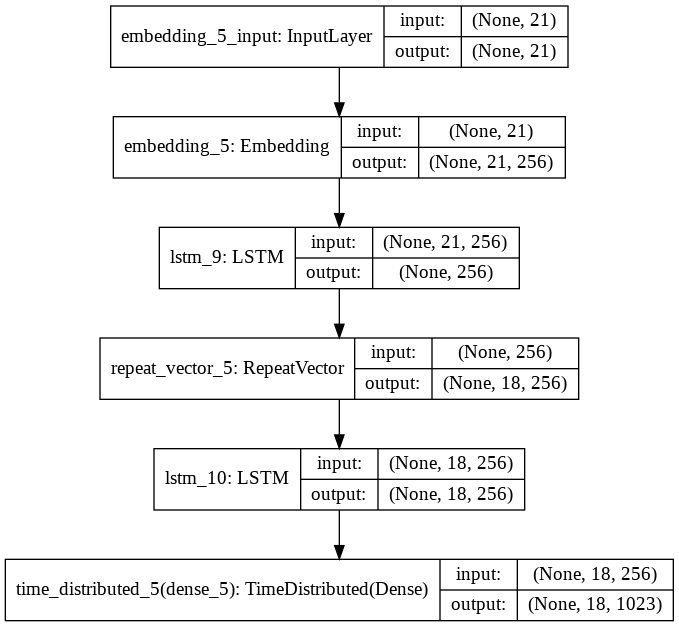

In [116]:
# Using an encoder-decoder LSTM model 


from keras.models import Sequential
from keras.layers import Embedding, LSTM,RepeatVector, Dense
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model

# define NMT model
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
 
# define model
model = define_model(afr_vocab_size, eng_vocab_size, afr_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')
# summarize defined model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

In [117]:
# fit model
from keras.callbacks import ModelCheckpoint
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#  model.fit(trainX, trainY, epochs=64, batch_size= 4, validation_data=(testX, testY), callbacks=[checkpoint], verbose=1)

model.fit(trainX, trainY, epochs=1, batch_size= 2, validation_data=(testX, testY), callbacks=[checkpoint], verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 797 samples, validate on 0 samples
Epoch 1/1
796/797 [============================>.] - ETA: 0s - loss: 2.3261

IndexError: ignored

In [ ]:



from pickle import load
from numpy import array
from numpy import argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
 
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))
 
# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)
 
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X
 
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None
 
# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)
 
# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
 
# load datasets
dataset = load_clean_sentences('english-afrikaan-both.pkl')
train = load_clean_sentences('english-afrikaan-train.pkl')
test = load_clean_sentences('english-afrikaan-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare afrikaan tokenizer
afrikaan_tokenizer = create_tokenizer(dataset[:, 1])
afrikaan_vocab_size = len(afrikaan_tokenizer.word_index) + 1
afrikaan_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(afrikaan_tokenizer, afrikaan_length, train[:, 1])
testX = encode_sequences(afrikaan_tokenizer, afrikaan_length, test[:, 1])
 
# load model
model = load_model('model.h5')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)